In [15]:
from sympy.combinatorics import Permutation, PermutationGroup
import numpy as np
import math
import sympy
import sympy.functions.combinatorial.numbers as math_num
from scipy.stats import chisquare
from scipy.stats import chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time
from tqdm import tqdm

In [16]:
def conv(x, y, r=5): # x - O, y - E
    print(x)
    print(y)
    i = len(x)-1
    new_x = [0 for k in range(len(x))] # should be revesred + croped
    new_y = [0 for k in range(len(x))] #
    k = 0
    while i > 0:
        s1 = x[i]
        s2 = y[i]
        if x[i] < r:
            while s1 < r:
                i -= 1
                s1 += x[i]
                s2 += y[i]
        new_x[k] = s1
        new_y[k] = s2
        i -= 1
        k += 1
    r_x = [0 for v in range(k)]
    r_y = [0 for v in range(k)]
    for c in range(k):
        r_x[c] = new_x[k - c - 1]
        r_y[c] = new_y[k - c - 1]
    print(r_x)
    print(r_y)
    return (r_x, r_y)

In [17]:
def chi(O, E):
    print(O)
    print(E)
    O,E = conv(O, E)
    print(O)
    print(E)
    r = 0
    for i in range(len(O)):
        r += (O[i] - E[i])**2/E[i]
    return (r, len(O))

## Permutation

In [18]:
n = 100  # длина подстановки
N = 2 ** 16 # размер выборки подстановок

num_of_cycles = [0 for k in range(n+1)]
num_of_fixed_points = [0 for k in range(n+1)]
num_shortest_cycle = [0 for k in range(n+1)]
num_of_orders = {}

a = Permutation(np.random.permutation(n))

for i in tqdm(range(N)):
    a = Permutation(np.random.permutation(n))
    cycle_num = a.cycles
    num_of_cycles[a.cycles] += 1
    if 1 in a.cycle_structure.keys():
        num_of_fixed_points[a.cycle_structure[1]]  += 1
    else:
        num_of_fixed_points[0] += 1
    num_shortest_cycle[min(a.cycle_structure.keys())] += 1 
    order = 1
    for x in list(a.cycle_structure.keys()):
        order = np.lcm(order, x)
    if order in num_of_orders:
        num_of_orders[order] += 1
    else:
        num_of_orders[order] = 1
    
    
print(num_of_cycles)
print(num_of_fixed_points)
print(num_shortest_cycle)
print(num_of_orders)

#print(a)
#print(a.list())
#print(a.inversions())
#print(a.is_even)


100%|████████████████████████████████████| 65536/65536 [03:43<00:00, 293.14it/s]

[0, 641, 3382, 8216, 12739, 13839, 11459, 7758, 4241, 2040, 824, 288, 76, 28, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24143, 24054, 11980, 4066, 1044, 216, 28, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 41393, 9496, 4192, 2403, 1469, 989, 706, 565, 425, 386, 302, 278, 240, 187, 158, 147, 131, 107, 106, 93, 77, 73, 59, 66, 47, 49, 53, 39, 40, 46, 33, 27, 35, 37, 28, 24, 26, 37, 33, 33, 29, 14, 26, 29, 30, 25, 29, 34, 31, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Comparison of statistical distributions

In [19]:
# Неподвижные точки
E_prob_of_fixed_points = [((1 / math.factorial(k)) * (sympy.subfactorial(n - k) / math.factorial(n - k))) for k in range(n+1)]
E_num_of_fixed_points = [ x*N  for x in E_prob_of_fixed_points]
(num_of_fixed_points_stat, points_array_len) = chi(num_of_fixed_points, E_num_of_fixed_points)

# print(E_num_of_fixed_points)

points_quantile = chi2.ppf(1-0.05, df=points_array_len-1)
p_value = chi2.sf(float(num_of_fixed_points_stat), int(points_array_len-1))

print("Квантиль степени " + str(points_array_len - 1) + " = " + str(points_quantile))
print("Статистика для k неподвижных точек = " + str(num_of_fixed_points_stat))
print("p-value = " + str(p_value))

[24143, 24054, 11980, 4066, 1044, 216, 28, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24109.347056611645, 24109.347056611645, 12054.673528305822, 4018.224509435274, 1004.5561273588185, 200.91122547176371, 33.48520424529395, 4.783600606470564, 0.5979500758088205, 0.06643889731209118, 0.006643889731209117, 0.0006039899755644652, 5.033249796370544e-05, 3.871730612592725e-06, 2.765521866137661e-07, 1.843681244091774e-08, 1.1523007775573588e-09, 6.778239867984464e-11, 3.765688815546924e-12, 1.9819414818668023e-13, 9.909707409334012e-15, 4.718908290159053e-16, 2.1449583137086607e-17, 9.325905711776786e-19, 3.8857940465736605e-20, 1.554317618629464e-21, 5.9781446870364e-23, 2.2141276618653335e-24, 7.90759879237619e-26, 2.726758204267652e-27, 9.0891940142255

In [20]:
# Длины циклов
E_prob_of_cycles = [((1 / math.factorial(n)) * math_num.stirling(n, k, kind=1)) for k in range(len(num_of_cycles))]
E_num_of_cycles = [ x*N  for x in E_prob_of_cycles]
(num_of_cycle_stat, cycle_array_len) = chi(num_of_cycles, E_num_of_cycles)

#print(E_num_of_cycles)

cycle_quantile = chi2.ppf(1-0.05, df=cycle_array_len-1)
p_value = chi2.sf(float(num_of_cycle_stat), int(cycle_array_len-1))

print("Квантиль степени " + str(cycle_array_len - 1) + " = " + str(cycle_quantile))
print("Статистика для ровно k циклов = " + str(num_of_cycle_stat))
print("p-value = " + str(p_value))

[0, 641, 3382, 8216, 12739, 13839, 11459, 7758, 4241, 2040, 824, 288, 76, 28, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 655.360000000000, 3393.04612996030, 8247.82161837271, 12647.5322135815, 13841.4925484995, 11581.3018750860, 7743.12747981412, 4266.45629753922, 1982.10396041343, 790.194377676407, 274.132322893940, 83.7039387565169, 22.7085845671338, 5.51757156773884, 1.20884487265673, 0.240218396279457, 0.0435187862372909, 0.00721996203107181, 0.00110130936124169, 0.000155002872409697, 2.01931962578655e-5, 2.44200241848883e-6, 2.74842601933858e-7, 2.88559853889662e-8, 2.83222050504686e-9, 2.60376636310322e-10, 2.24612211548417e-11, 1.82108191136130e-12, 1.38976388988058e-13, 9.99692822848508e-15, 6.78668188017455e-16, 4.35333537930011e-17, 2.64137145497422e-18, 1.5

In [21]:
# Кратчайший цикл имеет длину k

def expindex(x, M):
    res = x
    for i in range(2, M + 1):
        res += (x**i) / i
    return -res

def nthcoeff(f, x, n):
    res = sympy.diff(f, x, n)
    return res.subs(x, 0) / math.factorial(n)

def get_polynom_for_cycle_length(M, n): 
    x = sympy.Symbol('x')
    f = 1 - sympy.exp(-x) if  M == 0 else sympy.exp(expindex(x, M)) - sympy.exp(expindex(x, M + 1))
    return nthcoeff(f / (1 - x), x, n)

def gen_prob_of_shortest_cycles(n):
    t = time.perf_counter()
    short_cycle_length_exp = [0] * n
    for i in tqdm(range(math.floor(n / 2) + 1)):
        short_cycle_length_exp[i] = get_polynom_for_cycle_length(i, n) 
    short_cycle_length_exp[n-1] = get_polynom_for_cycle_length(n-1, n)
    exp = np.array(np.array([float(i) for i in short_cycle_length_exp]))
    # exp = np.trim_zeros(np.sort(exp))
    return exp

def gen_prob_of_shortest_cycles2(n):
    exp = [0] * (n+1)
    for i in range(1, math.floor(n / 2)):
        exp[i+1] = math.exp(-sympy.harmonic(i)) - math.exp(-sympy.harmonic(i+1))
    exp[1] = 1 - math.exp(-1)
    exp[n] = 1 / n
    return exp


In [22]:
# Кратчайший цикл имеет длину k

E_prob_of_shortest_cycle = gen_prob_of_shortest_cycles2(n) # without 2 -> its coeff method
E_num_of_shortest_cycle = [ x*N  for x in E_prob_of_shortest_cycle]

#num_shortest_cycle = gen_prob_of_shortest_cycles2(n)
#num_shortest_cycle = [ x*N  for x in num_shortest_cycle]

(shortest_cycle_stat, shortest_cycle_array_len) = chi(num_shortest_cycle, E_num_of_shortest_cycle)

shortest_cycle_quantile = chi2.ppf(1-0.05, df=shortest_cycle_array_len-1)
p_value = chi2.sf(float(shortest_cycle_stat), int(shortest_cycle_array_len-1))

print("Квантиль степени " + str(shortest_cycle_array_len - 1) + " = " + str(shortest_cycle_quantile))
print("Статистика для минимального цикла длины k = " + str(shortest_cycle_stat))
print("p-value = " + str(p_value))

[0, 41393, 9496, 4192, 2403, 1469, 989, 706, 565, 425, 386, 302, 278, 240, 187, 158, 147, 131, 107, 106, 93, 77, 73, 59, 66, 47, 49, 53, 39, 40, 46, 33, 27, 35, 37, 28, 24, 26, 37, 33, 33, 29, 14, 26, 29, 30, 25, 29, 34, 31, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 641]
[0, 41426.652943388355, 9486.288881124148, 4145.179136408677, 2317.6986385167775, 1479.189755957692, 1025.6541597816058, 752.850270479029, 576.0573152217075, 454.9702187857247, 368.4180039878961, 304.4117256087752, 255.74825013997815, 217.88771275674299, 187.85344190791784, 163.62777871285925, 143.80380835216238, 127.37620581200372, 113.61112446942298, 101.9627407297719, 92.01826801868833, 83.46085760357118, 76.04403229235822, 69.57373017673422, 63.895475383556914, 58.885068472795865, 54.44173462165372, 50.48301502097229, 46.940912426026216, 43.75895092279461, 40.889910227507244, 38.29406328403252, 35.9377933208

In [13]:
# Порядки подстановок
#E_prob_of_orders = [((1 / math.factorial(n)) * math_num.stirling(n, k, kind=1)) for k in range(len(num_of_cycles))]
#E_num_of_orders = [ x*N  for x in E_prob_of_cycles]
#(order_stat, order_array_len) = chi(num_of_orders, E_num_of_orders)

#print(E_num_of_cycles)

#cycle_quantile = chi2.ppf(1-0.05, df=cycle_array_len-1)
#p_value = chi2.sf(float(num_of_cycle_stat), int(cycle_array_len-1))

#print("Квантиль степени " + str(cycle_array_len - 1) + " = " + str(cycle_quantile))
#print("Статистика для ровно k циклов = " + str(num_of_cycle_stat))
#print("p-value = " + str(p_value))

## Show distributions

/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.3683929443359375, 0.367034912109375, 0.18280029296875, 0.062042236328125, 0.01593017578125, 0.0032958984375, 0.00042724609375, 6.103515625e-05, 1.52587890625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.061313240195240384, 0.015328310048810096, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05, 9.123994076672677e-06, 1.0137771196302976e-06, 1.0137771196302974e-07, 9.216155633002704e-09, 7.680129694168921e-10, 5.90779207243763e-11, 4.2198514803125934e-12, 2.8132343202083955e-13, 1.75827145

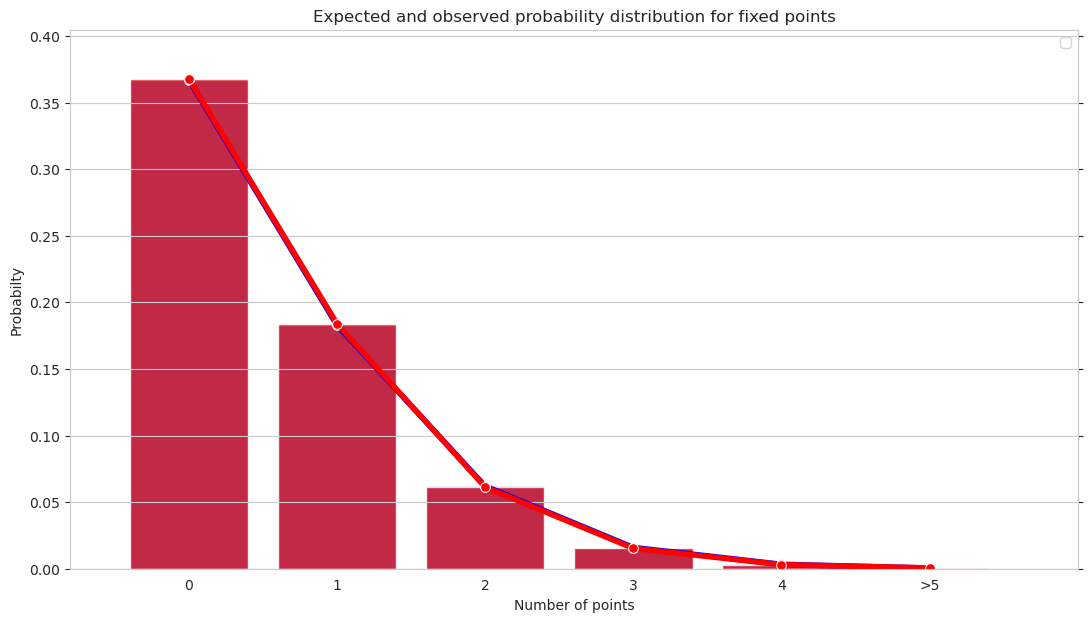

In [24]:
# x,y - two arrays with distribution, r - first x label
def compare_two_distr_graph(x, y, r=0):
    df_to_show = pd.DataFrame(columns = ['D1', 'D2'])
    df_to_show['D1'], df_to_show['D2'] = conv(x, y, 0.0001)
    df_to_show['D1'], df_to_show['D2'] = df_to_show['D1'].astype(float), df_to_show['D2'].astype(float)
    df_to_show['x'] = [k for k in range(0, len(df_to_show))]
    print(df_to_show)
    xticklabels= [k for k in range(r, len(df_to_show)+r)]
    xticklabels[len(df_to_show)-1] = '>' + str(len(df_to_show)+r-1)
    width = 0.8
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style="whitegrid", rc=None)
    fig, ax = plt.subplots(figsize=(13,7))
    ax_twin = ax.twinx()
    sns.barplot(data = df_to_show, x='x', y='D1', alpha=0.8, ax=ax, color = 'blue', width=width)
    sns.barplot(data = df_to_show, x='x', y='D2', alpha=0.8, ax=ax, color = 'red', width=width).set(xlabel = "Number of points",ylabel='Probabilty', xticklabels=xticklabels)
        
    sns.lineplot(data = df_to_show, x='x', y='D1', marker='o', err_style='bars', color = 'blue', ax=ax_twin, sort = False, linewidth = 4, markersize=7).set(ylabel='Probabilty')
    sns.lineplot(data = df_to_show, x='x', y='D2', marker='o', err_style='bars', color = 'red', ax=ax_twin, sort = False, linewidth = 4, markersize=7).set(title='Expected and observed probability distribution for fixed points', yticklabels=[], ylabel=None)
     
    max_x = len(df_to_show)
    max_y = max(max(df_to_show['D1']), max(df_to_show['D2']))*1.1
    ax.set_xlim([-width, max_x])
    ax.set_ylim([0, max_y])
    ax_twin.set_xlim([-width, max_x])
    ax_twin.set_ylim([0, max_y])
    ax.legend() ## add legend

prob_of_fixed_points = [k/N for k in num_of_fixed_points]
compare_two_distr_graph(prob_of_fixed_points, E_prob_of_fixed_points, 0)

## Correlation table

In [ ]:
def count_records(permutation: Permutation): 
    maximum = -1
    records = 0 
    for index, elem in enumerate(permutation.list()): 
         if elem > maximum: 
            records += 1
            maximum = elem    
    return records

In [ ]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

def calculate_avg_length(a):
    r = k = 0
    for i in a:
        r += k*i
        k += 1
    return r

In [ ]:
# correlation table

corr_df = pd.DataFrame(columns=['n','N','FP & SC', 'FP & Rec', 'FP & NoC', 'FP & Ord', 'FP & Inv', 'FP & Evn',
                                'SC & Noc', 'SC & Rec', 'SC & Ord', 'SC & Inv', 'SC & Evn', 'Rec & NoC',
                                'Rec & Ord', 'Rec & Inv', 'Rec & Evn', 'Noc & Ord', 'Noc & Inv', 'Noc & Evn',
                                'Ord & Inv', 'Ord & Evn', 'Inv & Evn'])

# длина подстановки n
# длина выборки N
n_N_values = [(10, 2**10), (10, 2**12), (10, 2**14), (10, 2**16), (10, 2**18),
              (25, 2**10), (25, 2**12), (25, 2**14), (25, 2**16), (25, 2**18),
              (50, 2**10), (50, 2**12), (50, 2**14), (50, 2**16), (50, 2**18),
              (100, 2**10), (100, 2**12), (100, 2**14), (100, 2**16), (100, 2**18),
              (200, 2**10), (200, 2**14), (200, 2**16), (200, 2**18),
              (500, 2**10), (500, 2**14), (500, 2**16), (500, 2**18),
              (1000, 2**10), (1000, 2**14), (1000, 2**16) 
             ]

t1 = time.perf_counter()

for p in n_N_values[27:28]:
    
    n, N = p
    
    # 'Fixed points','Shortest cycle','Records', 'Number of cycles', 'Order', 'Inversions', 'Even'
    df = pd.DataFrame(columns=['FP','SC','Rec', 'NoC', 'Ord', 'Inv', 'Evn'])

    num_of_cycles = 0
    num_of_fixed_points = 0
    length_of_shortes_cycle = 0
    order = 1
    even = 0
    inversions = 0
    
    for i in tqdm(range(N)):
        a = Permutation(np.random.permutation(n))
        num_of_cycles = a.cycles
        if 1 in a.cycle_structure.keys():
            num_of_fixed_points = a.cycle_structure[1]
        else:
            num_of_fixed_points = 0
        length_of_shortes_cycle = min(a.cycle_structure.keys())
        num_of_records = count_records(a)
        order = 1
        for x in list(a.cycle_structure.keys()):
            order = np.lcm(order, x)
        even = a.is_even
        inversions = a.inversions()
        df.loc[len(df)] = [num_of_fixed_points, length_of_shortes_cycle, num_of_records, num_of_cycles, order, inversions, even]        
            
    print("n="+ str(n), "N=" + str(N), " - Done," + " Time: " + str(round(time.perf_counter() - t1, 1)))
    df = df.astype({"Evn": int})
    #for col in df.columns:
    #    df[col] = min_max_scaling(df[col])
    cm = df.corr()
    corr_df.loc[len(corr_df)] = [n, N, cm['FP']['SC'], cm['FP']['Rec'], cm['FP']['NoC'], cm['FP']['Ord'], cm['FP']['Inv'],
                                 cm['FP']['Evn'], cm['SC']['Rec'], cm['SC']['NoC'], cm['SC']['Ord'], cm['SC']['Inv'], cm['SC']['Evn'],
                                 cm['Rec']['NoC'], cm['Rec']['Ord'], cm['Rec']['Inv'], cm['Rec']['Evn'], cm['NoC']['Ord'],
                                 cm['NoC']['Inv'], cm['NoC']['Evn'], cm['Ord']['Inv'], cm['Ord']['Evn'], cm['Inv']['Evn'],
                                ]


corr_df = corr_df.round(3)
corr_df = corr_df.astype({"n": int, "N": int})
# df.to_csv("./df.csv", index=None)  
# df.to_csv("./df.csv", index=None, mode='a', header=None)  
# corr_df.to_csv("./corr.csv", index=None)  
corr_df.to_csv("./corr.csv", index=None, mode='a', header=None)  

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
print(df)